# Анализ параметров установок на режимах частичной мощности

## Импорт библиотек

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Latex
from IPython.display import Math
pd.set_option('max_colwidth',80)

## Постоянные

In [2]:
data_root = '/home/artem/gowork/src/github.com/Sovianum/cooling-course-project/notebooks/data/'

## Функции ввода-вывода

### Функции работы с текстом

In [3]:
def get_2_shafts_parameters_note(extremal_value_df):
    pi = extremal_value_df.pi.values[0]
    eta = extremal_value_df.eta.values[0]
    power = extremal_value_df.N_e.values[0] / 1e6
    mass_rate = extremal_value_df.G.values[0]
    return Math(r'''
    \begin{align}
        \pi = %.1f && \eta = %.3f && L_e = %.3f \ МДж/кг && G = %.1f \ кг/с
    \end{align}
    ''' % (pi, eta, power, mass_rate))

### Функции работы с графиками

In [4]:
def plot_characteristic(power, y_arr, ylabel):
    plt.title('$Приведенная \ характеристика \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(power / power.max(), y_arr)
    plt.ylabel(ylabel, fontsize=20)
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()

def plot_common_characteristics(data, y_min=0.8, y_max=1.02):
    plt.title('$Приведенные \ характеристики \ установки \ (\overline{f} = f / f_{max})$')
    plt.plot(data.power / data.power.max(), data.mass_rate / data.mass_rate.max())
#     plt.plot(data.pi, data.eta / data.eta.max())
    plt.ylim([y_min, y_max])
    plt.xlabel('$\overline{N_e}$', fontsize=20)
    plt.grid()
    plt.legend(['$\overline{G}$', '$\overline{\eta}$'], loc='lower right')

## Загрузка данных 

In [5]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')
# data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

## Двухвальная установка без регенератора

### Загрузка данных

In [28]:
data_2n = pd.read_json(data_root + '2n.json').sort_values('t')

In [29]:
data_2n

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,t
16,NaN,1.0,0.995663,45.140791,8.020366,2.569756,2.816089,9.781292,2546.126609,9474.047413,1240
15,NaN,1.0,0.996496,45.660893,8.147033,2.608320,2.818271,10.170393,2579.450338,9511.977429,1250
14,NaN,1.0,0.997216,46.173876,8.273096,2.646960,2.820102,10.562816,2612.208433,9549.054088,1260
13,NaN,1.0,0.997831,46.680337,8.398642,2.685694,2.821608,10.958293,2644.410651,9585.340389,1270
12,NaN,1.0,0.998349,47.180156,8.523633,2.724500,2.822813,11.356470,2676.059204,9620.844833,1280
11,NaN,1.0,0.998778,47.673697,8.648117,2.763379,2.823744,11.756938,2707.152169,9655.609848,1290
10,NaN,1.0,0.999126,48.161417,8.772163,2.802339,2.824426,12.159489,2737.703250,9689.682462,1300
9,NaN,1.0,0.999401,48.643403,8.895769,2.841364,2.824886,12.563701,2767.709207,9723.081837,1310
8,NaN,1.0,0.999612,49.120179,9.019021,2.880463,2.825149,12.969374,2797.183320,9755.856495,1320
7,NaN,1.0,0.999767,49.592119,9.141971,2.919634,2.825242,13.376219,2826.131634,9788.042993,1330


### Построим общие характеристики установки

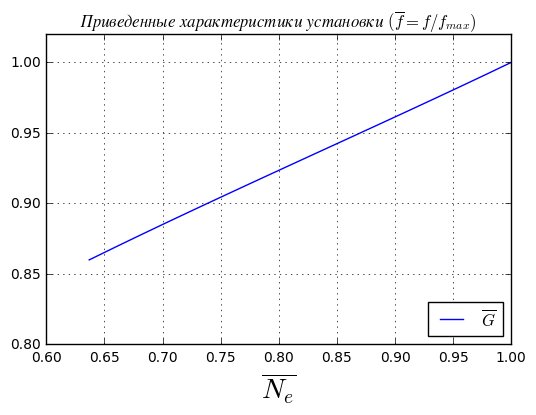

In [8]:
plot_common_characteristics(data_2n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

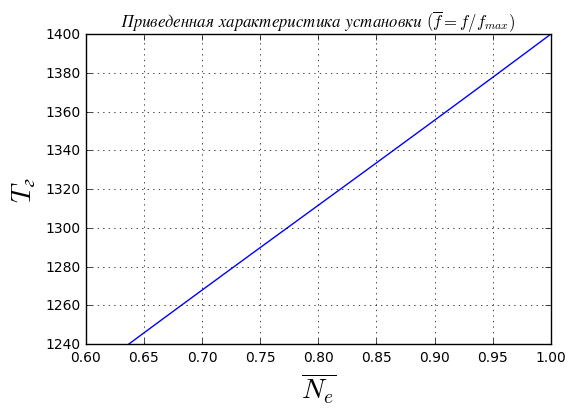

In [9]:
plot_characteristic(data_2n.power, data_2n.t, "$T_г$")
plt.show()

## Двухвальная установка с регенератором

### Загрузка данных

In [63]:
data_2nr = pd.read_json(data_root + '2nr.json').sort_values('t')

In [69]:
data_2nr

,eta,g_norm_tc,g_norm_tf,mass_rate,pi_c,pi_f,pi_tc,power,rpm_ft,rpm_tc,sigma,t
99,NaN,0.999999,0.990440,47.781352,6.533095,2.231302,2.407763,8.935555,2462.257736,9456.097517,0.861129,1252
98,NaN,0.999999,0.990710,47.891974,6.553822,2.237754,2.408438,9.012547,2469.309371,9464.710116,0.860242,1254
97,NaN,1.000000,0.990974,48.002218,6.574519,2.244206,2.409098,9.089713,2476.336839,9473.279872,0.859358,1256
96,NaN,1.000000,0.991233,48.112092,6.595188,2.250657,2.409745,9.167055,2483.340500,9481.807676,0.858477,1258
95,NaN,1.000000,0.991488,48.221581,6.615826,2.257106,2.410379,9.244565,2490.319975,9490.292555,0.857597,1260
94,NaN,1.000000,0.991737,48.330697,6.636434,2.263555,2.410998,9.322242,2497.275483,9498.735695,0.856720,1262
93,NaN,1.000000,0.991981,48.439446,6.657014,2.270004,2.411605,9.400088,2504.207456,9507.137681,0.855846,1264
92,NaN,1.000000,0.992221,48.547780,6.677559,2.276450,2.412198,9.478078,2511.113946,9515.495139,0.854974,1266
91,NaN,1.000000,0.992455,48.655747,6.698074,2.282894,2.412778,9.556228,2517.996684,9523.811871,0.854104,1268
90,NaN,1.000000,0.992685,48.763350,6.718561,2.289339,2.413345,9.634539,2524.856098,9532.088426,0.853237,1270


In [70]:
plt.plot(data_2nr.pi_c, data_2nr.t)
plt.grid()

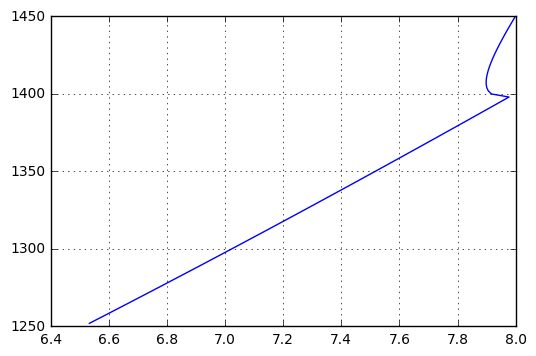

In [71]:
plt.show()

### Построим общие характеристики установки

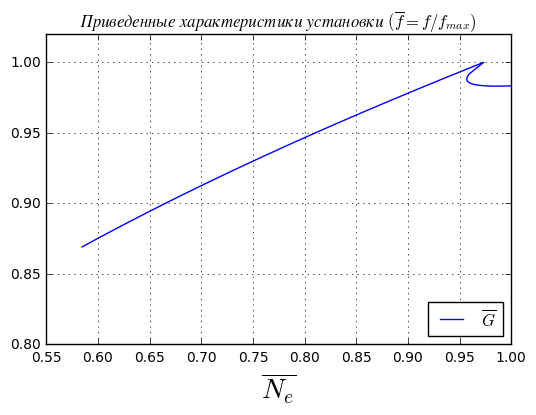

In [65]:
plot_common_characteristics(data_2nr)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

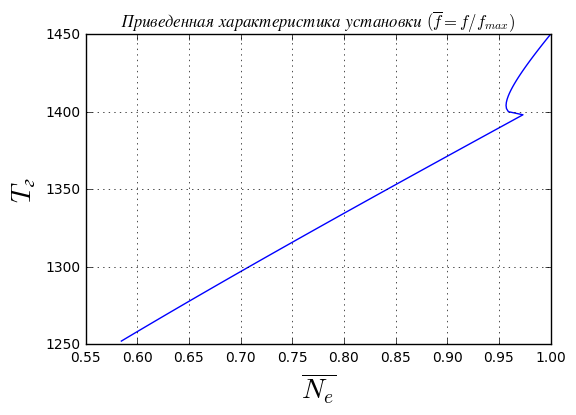

In [66]:
plot_characteristic(data_2nr.power, data_2nr.t, "$T_г$")
plt.show()

### Построим зависимость коэффициента восстановления от относительной мощности установки

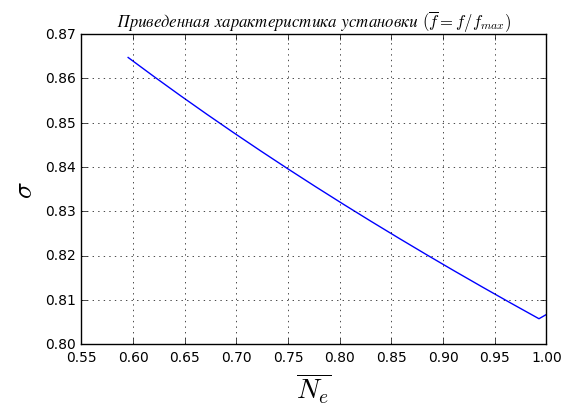

In [40]:
plot_characteristic(data_2nr.power, data_2nr.sigma, "$\sigma$")
plt.show()

## Трехвальная установка без пром. охлаждения, пром. подогрева и регенератора

### Загрузка данных

In [15]:
data_3n = pd.read_json(data_root + '3n.json').sort_values('t')

In [16]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.852383,1.0,0.999768,27.031426,1.297960,1.765999,2.165624,1.048487,1079.281447,5510.672083,4542.615846,1290
15,NaN,0.856995,1.0,0.999820,27.479565,1.316952,1.769449,2.206145,1.153260,1114.165214,5542.624933,4596.230073,1300
14,NaN,0.861516,1.0,0.999864,27.926510,1.335976,1.772901,2.246670,1.263000,1148.511499,5574.528574,4648.206126,1310
13,NaN,0.865946,1.0,0.999899,28.371914,1.355021,1.776361,2.287165,1.377703,1182.351385,5606.393633,4698.605763,1320
12,NaN,0.870284,1.0,0.999927,28.815547,1.374083,1.779832,2.327601,1.497376,1215.716586,5638.236613,4747.493137,1330
11,NaN,0.874530,1.0,0.999949,29.257061,1.393154,1.783322,2.367938,1.621994,1248.626249,5670.080352,4794.909362,1340
10,NaN,0.878684,1.0,0.999966,29.696349,1.412233,1.786834,2.408160,1.751566,1281.108098,5701.933049,4840.923818,1350
9,NaN,0.882770,1.0,0.999978,30.136629,1.431432,1.790449,2.448414,1.886875,1313.365656,5734.082598,4885.693326,1360
8,NaN,0.886779,1.0,0.999987,30.576475,1.450705,1.794143,2.488607,2.027690,1345.342435,5766.445104,4929.203569,1370
7,NaN,0.890696,1.0,0.999993,31.013765,1.469982,1.797869,2.528630,2.173556,1376.946645,5798.847632,4971.455411,1380


### Построим общие характеристики установки

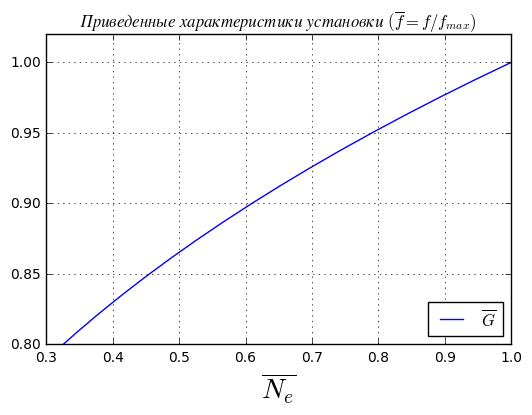

In [17]:
plot_common_characteristics(data_3n)
plt.show()

### Построим зависимость температуры газа от относительной мощности установки

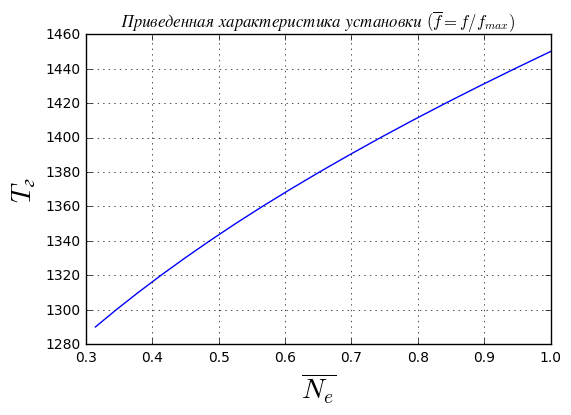

In [18]:
plot_characteristic(data_3n.power, data_3n.t, "$T_г$")
plt.show()

In [19]:
data_3n

,eta,g_norm_ft,g_norm_hpt,g_norm_lpt,mass_rate,pi_ft,pi_hpc,pi_lpc,power,rpm_ft,rpm_hpt,rpm_lpt,t
16,NaN,0.852383,1.0,0.999768,27.031426,1.297960,1.765999,2.165624,1.048487,1079.281447,5510.672083,4542.615846,1290
15,NaN,0.856995,1.0,0.999820,27.479565,1.316952,1.769449,2.206145,1.153260,1114.165214,5542.624933,4596.230073,1300
14,NaN,0.861516,1.0,0.999864,27.926510,1.335976,1.772901,2.246670,1.263000,1148.511499,5574.528574,4648.206126,1310
13,NaN,0.865946,1.0,0.999899,28.371914,1.355021,1.776361,2.287165,1.377703,1182.351385,5606.393633,4698.605763,1320
12,NaN,0.870284,1.0,0.999927,28.815547,1.374083,1.779832,2.327601,1.497376,1215.716586,5638.236613,4747.493137,1330
11,NaN,0.874530,1.0,0.999949,29.257061,1.393154,1.783322,2.367938,1.621994,1248.626249,5670.080352,4794.909362,1340
10,NaN,0.878684,1.0,0.999966,29.696349,1.412233,1.786834,2.408160,1.751566,1281.108098,5701.933049,4840.923818,1350
9,NaN,0.882770,1.0,0.999978,30.136629,1.431432,1.790449,2.448414,1.886875,1313.365656,5734.082598,4885.693326,1360
8,NaN,0.886779,1.0,0.999987,30.576475,1.450705,1.794143,2.488607,2.027690,1345.342435,5766.445104,4929.203569,1370
7,NaN,0.890696,1.0,0.999993,31.013765,1.469982,1.797869,2.528630,2.173556,1376.946645,5798.847632,4971.455411,1380
